In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

markers_path = "../results/tables/human_celltype_markers.csv"
human_markers = pd.read_csv(markers_path)

human_markers.head()

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,Adipo-MSC,PLEKHS1,5.933576,5.933576,0.0,0.0
1,Adipo-MSC,GALNT17,5.591051,5.591051,0.0,0.0
2,Adipo-MSC,CCBE1,5.550529,5.550529,0.0,0.0
3,Adipo-MSC,AL034417.2,5.354651,5.354651,0.0,0.0
4,Adipo-MSC,CBLN2,5.189141,5.189141,0.0,0.0


In [2]:
print("Columns:", human_markers.columns.tolist())
print("\nNumber of unique human cell types (group):", human_markers["group"].nunique())

human_markers["group"].value_counts().head(20)

Columns: ['group', 'names', 'scores', 'logfoldchanges', 'pvals', 'pvals_adj']

Number of unique human cell types (group): 35


group
Adipo-MSC        50
Plasma Cell      50
Monocyte         50
MPP              50
Neutrophil       50
Osteo-MSC        50
Osteoblast       50
pDC              50
Pre-B            50
Megakaryocyte    50
Pre-Pro B        50
Pro-B            50
RBC              50
RNAlo MSC        50
SEC              50
THY1+ MSC        50
MEP              50
Mature B         50
AEC              50
Cycling HSPC     50
Name: count, dtype: int64

In [3]:
human_markers[human_markers["group"] == "Adipo-MSC"].head(15)


,group,names,scores,logfoldchanges,pvals,pvals_adj
0,Adipo-MSC,PLEKHS1,5.933576,5.933576,0.0,0.0
1,Adipo-MSC,GALNT17,5.591051,5.591051,0.0,0.0
2,Adipo-MSC,CCBE1,5.550529,5.550529,0.0,0.0
3,Adipo-MSC,AL034417.2,5.354651,5.354651,0.0,0.0
4,Adipo-MSC,CBLN2,5.189141,5.189141,0.0,0.0
5,Adipo-MSC,C8orf34,5.067443,5.067443,0.0,0.0
6,Adipo-MSC,GRIK1,5.053631,5.053631,0.0,0.0
7,Adipo-MSC,ADAMTSL3,4.910498,4.910498,0.0,0.0
8,Adipo-MSC,LINC02518,4.895864,4.895864,0.0,0.0
9,Adipo-MSC,AC093801.1,4.861369,4.861369,0.0,0.0


In [4]:
human_markers[human_markers["group"] == "Osteoblast"].head(15)

,group,names,scores,logfoldchanges,pvals,pvals_adj
1200,Osteoblast,SPP1,8.293769,8.293769,0.0,0.0
1201,Osteoblast,FGF23,7.082727,7.082727,0.0,0.0
1202,Osteoblast,GRIA1,6.973540,6.973540,0.0,0.0
1203,Osteoblast,PTPRZ1,6.905730,6.905730,0.0,0.0
1204,Osteoblast,IFITM5,6.688009,6.688009,0.0,0.0
1205,Osteoblast,FAM166B,6.443179,6.443179,0.0,0.0
1206,Osteoblast,CHAD,6.356188,6.356188,0.0,0.0
1207,Osteoblast,SLC44A5,6.288986,6.288986,0.0,0.0
1208,Osteoblast,SLC36A2,6.229745,6.229745,0.0,0.0
1209,Osteoblast,BGLAP,6.170585,6.170585,0.0,0.0


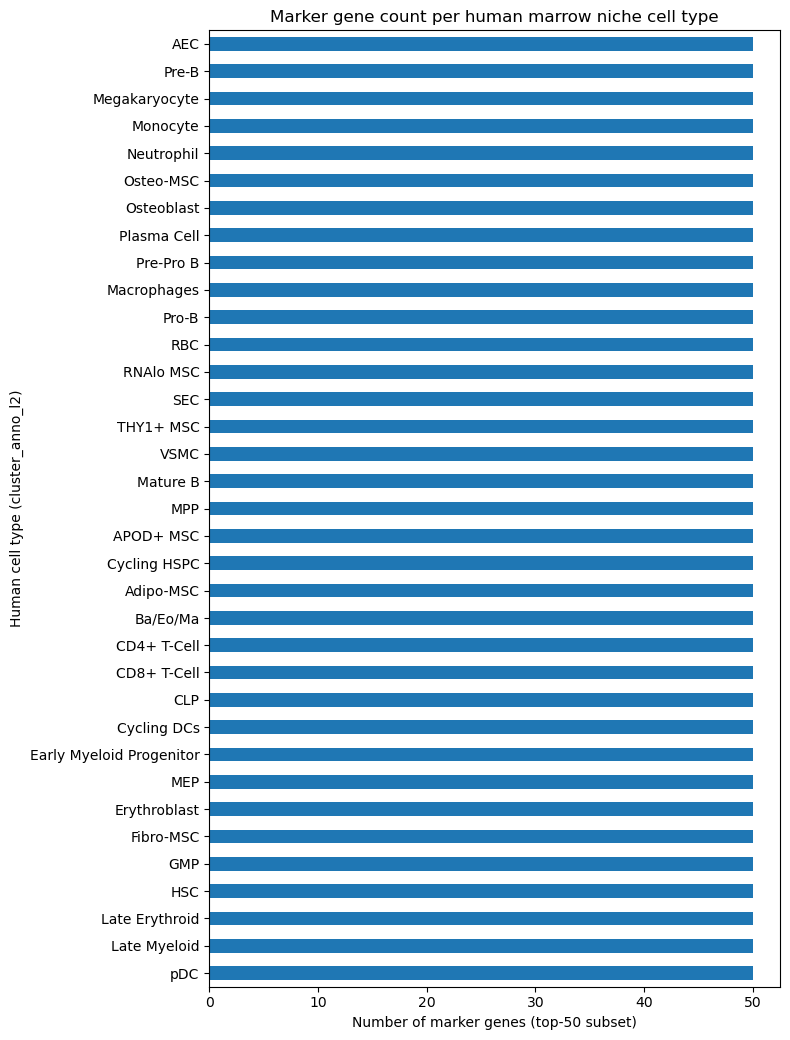

In [5]:
marker_counts = (
    human_markers.groupby("group")["names"]
    .nunique()
    .sort_values(ascending=False)
)

plt.figure(figsize=(8, 0.3 * len(marker_counts)))
marker_counts.plot(kind="barh")
plt.xlabel("Number of marker genes (top-50 subset)")
plt.ylabel("Human cell type (cluster_anno_l2)")
plt.title("Marker gene count per human marrow niche cell type")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [6]:
summary = (
    human_markers.groupby("group")
    .agg(
        n_markers=("names", "nunique"),
        max_lfc=("logfoldchanges", "max"),
        min_pval_adj=("pvals_adj", "min"),
    )
    .sort_values("n_markers", ascending=False)
)

summary.to_csv("../results/tables/human_celltype_marker_summary.csv")
summary.head()

,n_markers,max_lfc,min_pval_adj
group,,,
AEC,50,8.110354,0.0
Pre-B,50,8.567147,0.0
Megakaryocyte,50,5.722128,0.0
Monocyte,50,8.707756,0.0
Neutrophil,50,8.064258,0.0
